In [2]:
import pandas as pd
import os
import pandas_datareader.data as web
import pandas_datareader as pdr
import yfinance as yf
# yf.pdr_override() # <== that's all it takes :-)
from datetime import datetime
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot') 
import yfinance as yf


/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [10]:
symbola = pd.read_csv("large_cap_volume_leaders.csv").Symbol
symbolb = pd.read_csv("nasdaq_volume_leaders.csv").Symbol
symbolc = pd.read_csv("mid_cap_volume_leaders.csv").Symbol
symbold = pd.read_csv("small_cap_volume.csv").Symbol
symbols = [i for i in set(symbola.append(symbolb).append(symbolc).append(symbold))]
print(len(symbols))

618


In [32]:
[i for i in symbols[0:550] if "BPY" in i]

['BPY']

In [12]:
momentum_data("AAPL")

,stock,xdays,rev_spead
0,AAPL,431,0.253036


In [ ]:
mdf = get_momentum_stats(symbols)

In [51]:
mdf[(mdf['xdays'] > 0) & (mdf['xdays'] < 25)].sort_values(['rev_spead'], ascending=False)

,index,stock,xdays,rev_spead
80,0,SGMO,24,3.373576
19,0,PENN,24,1.074046
190,0,UBER,4,0.624138
108,0,FND,18,0.347752
167,0,RAMP,4,0.188826
115,0,AMCR,6,0.139171
27,0,SFIX,4,0.117945
83,0,NVTA,4,0.098688
189,0,AVTR,21,0.086859
2,0,ORCL,5,0.033412


In [13]:
def plot_smas(tickerSymbol):
    tickerData = yf.Ticker(tickerSymbol)
    df = tickerData.history(period='1d', start='2010-1-1', end='2020-7-7')
    df['SMA_50'] = df.iloc[:,1].rolling(window=50).mean()
    df['SMA_100'] = df.iloc[:,1].rolling(window=100).mean()
    df['SMA_150'] = df.iloc[:,1].rolling(window=150).mean()
    df['SMA_250'] = df.iloc[:,1].rolling(window=250).mean()
    print(df.tail(n=1)['SMA_250'][0]-df.tail(n=1)['SMA_250'][0])
    df[['SMA_50', 'SMA_250', 'Close']].plot(figsize=(20,12))

0.0


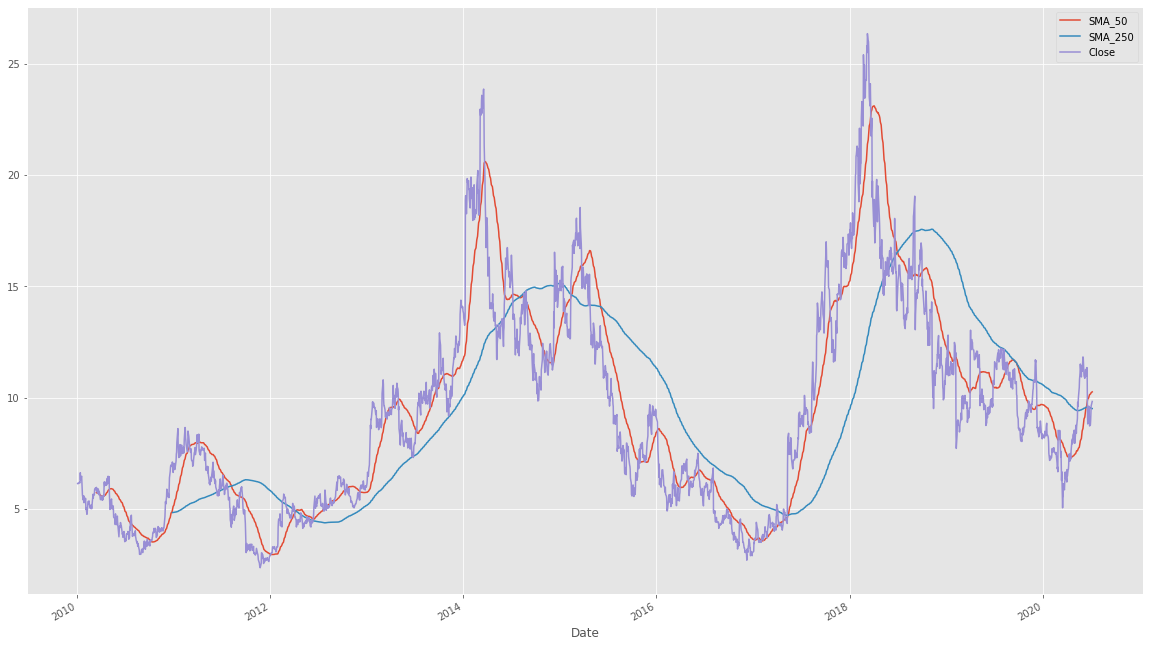

In [15]:
plot_smas("SGMO")